In [49]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(20,14)})

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

In [4]:
from umap import UMAP

In [5]:
movies = pd.read_csv('ml-latest/movies.csv').set_index('movieId')

In [6]:
rating = pd.read_csv('ml-latest/ratings.csv')

In [7]:
genres = pd.read_csv('genres.csv').what.tolist()

In [8]:
mean_rating = rating.groupby('movieId').mean().drop('userId', axis = 1).sort_index().rating
std_rating = rating.groupby('movieId').std().drop('userId', axis = 1).sort_index().rating

In [9]:
one_hot = []

for row in movies.genres.apply(lambda x: x.split('|')):
    d = dict(zip(genres, [0 for n in range(len(genres))]))
    for g in row:
        d[g] = 1

    one_hot.append(d)
    
rating_one_hot = pd.DataFrame(one_hot).fillna(0).drop('(no genres listed)', axis = 1)
rating_one_hot.index = movies.index

In [10]:
df = pd.DataFrame(movies.title)
df = pd.concat([df, rating_one_hot], axis = 1)
df['rating'] = mean_rating
df['std_rating'] = std_rating
df.rating = df.rating.fillna(mean_rating.mean())
df.std_rating = df.std_rating.fillna(std_rating.mean())

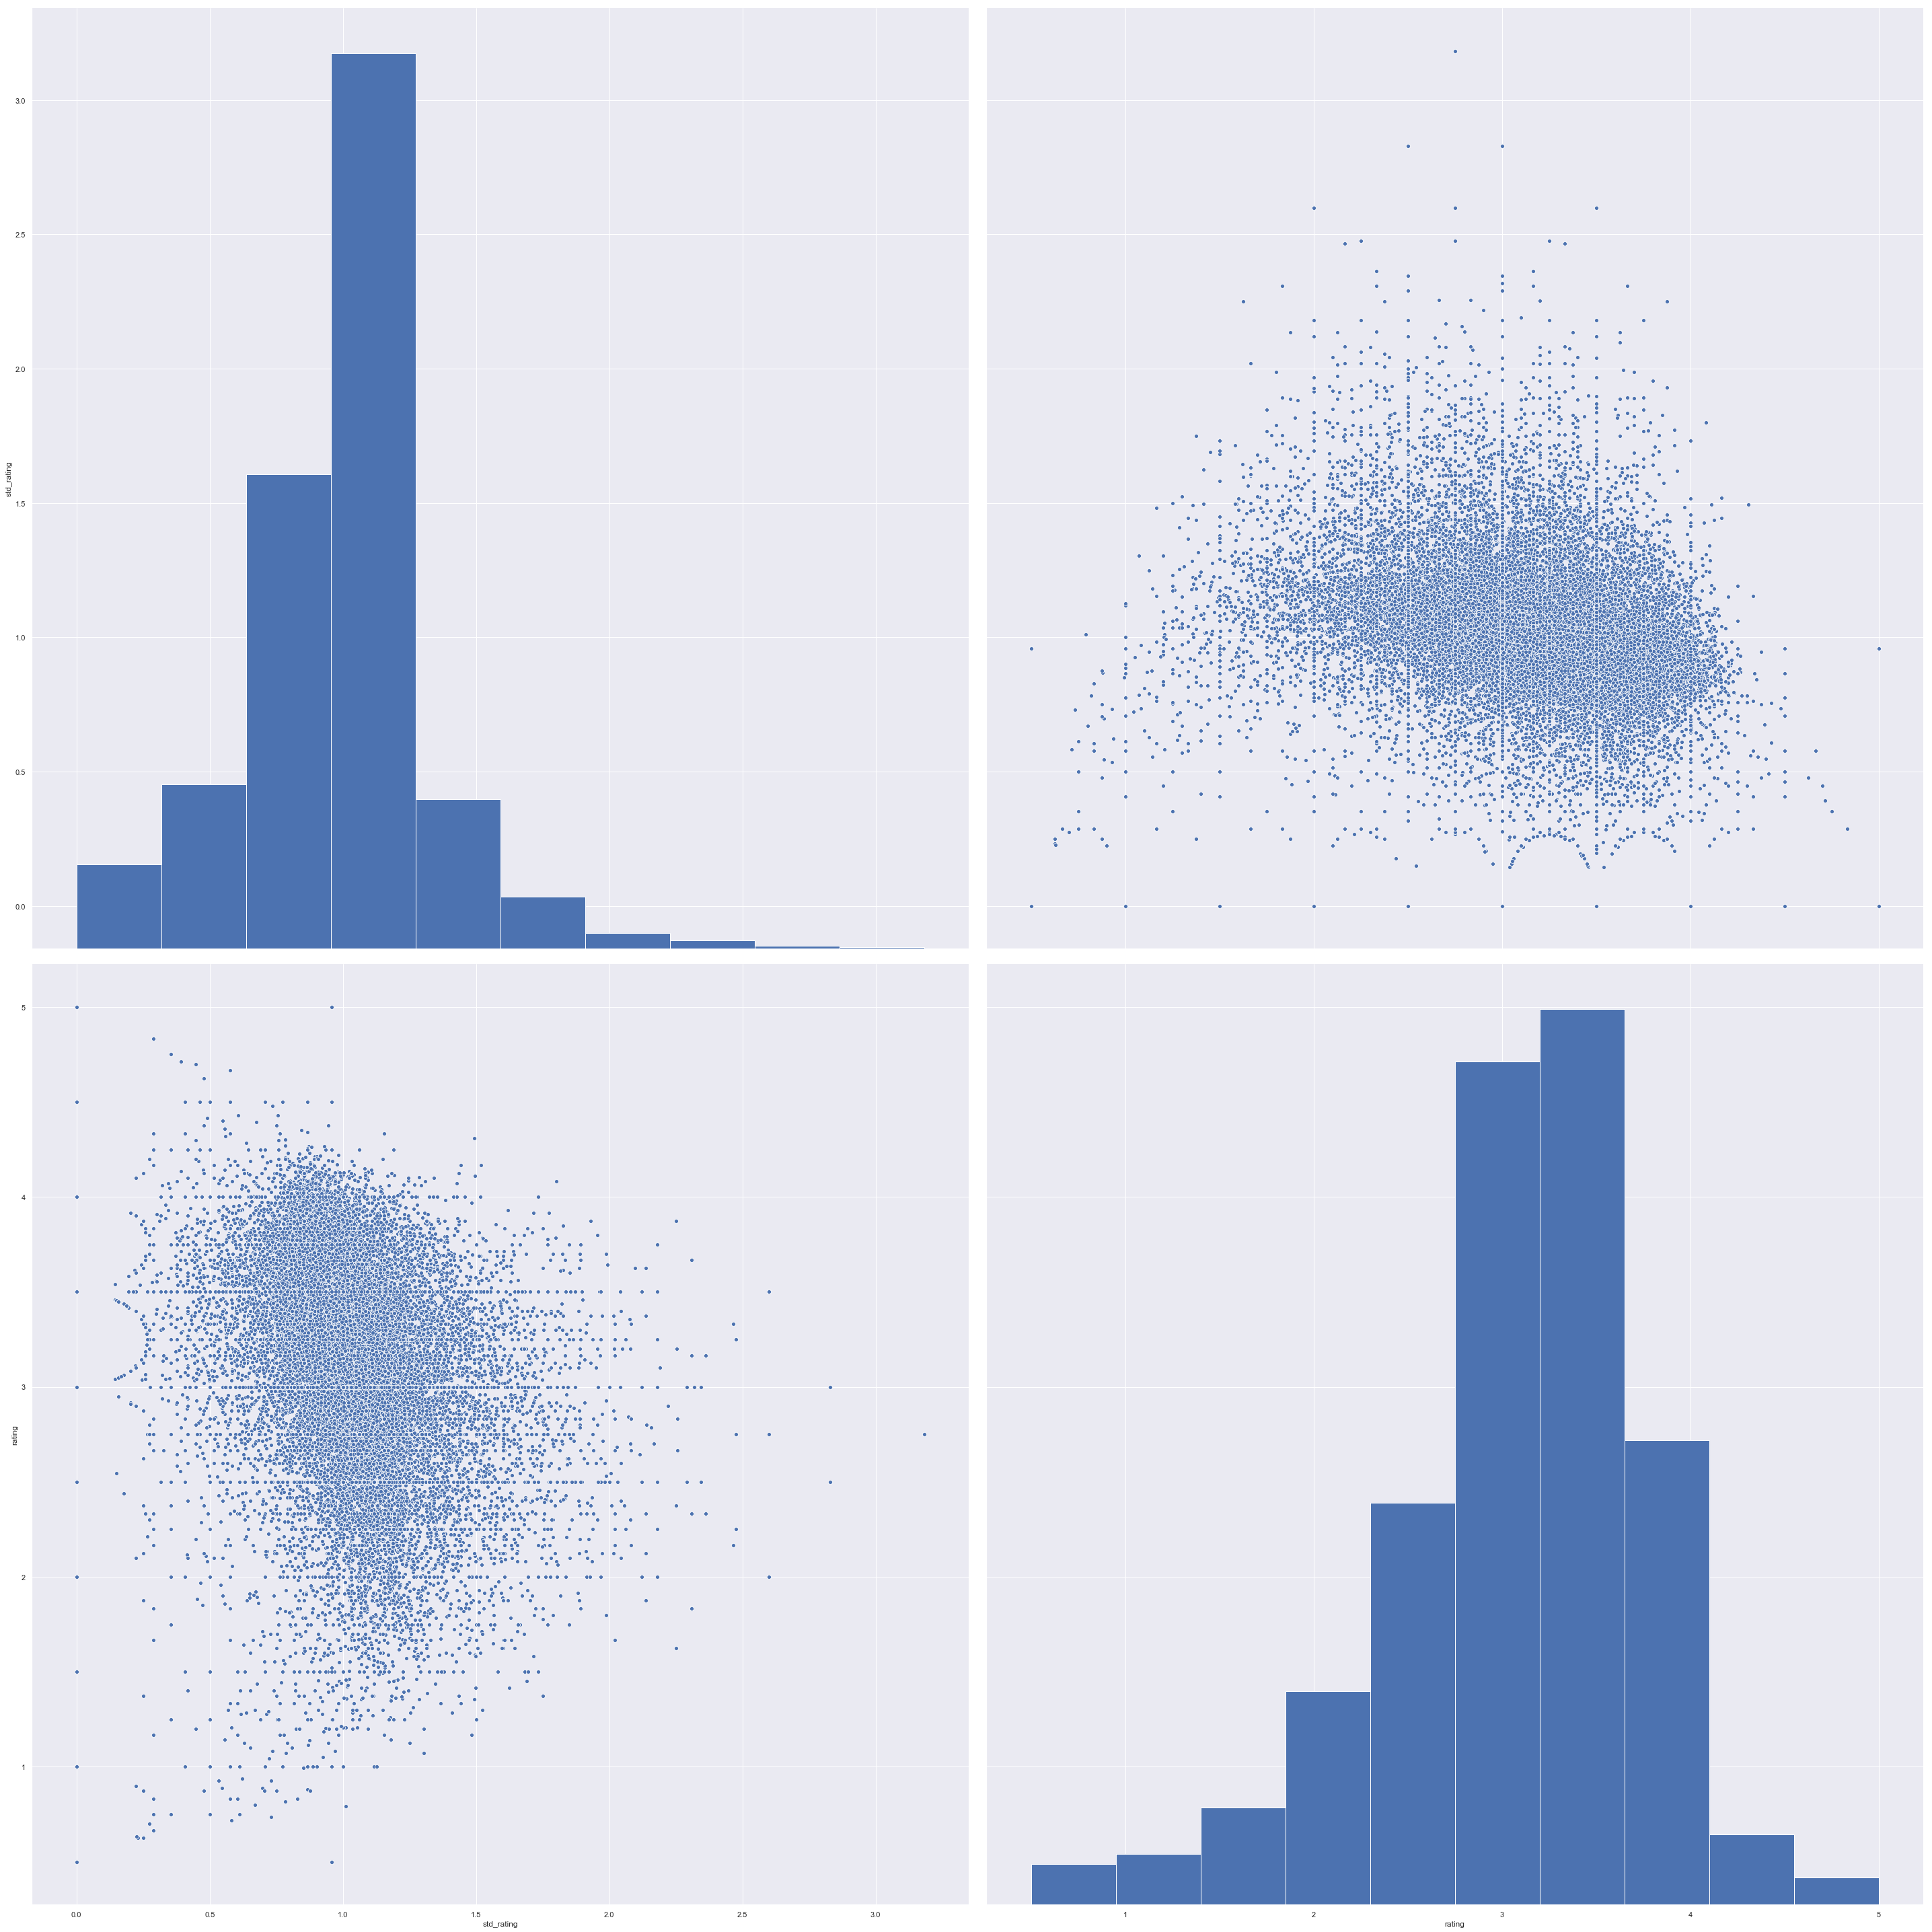

In [20]:
sns.pairplot(df[['std_rating', 'rating']], height=20)
plt.show()

In [30]:
from ackeras import clustering

In [43]:
params = {
    'data': df.drop('title', axis = 1),
    'categorical_features': df.columns[1:-2].tolist(),
}

In [44]:
clusterer = clustering.Clustering(**params)

-- Flag --: the column rating does not seem to be normalized
-- Flag --: the column std_rating does not seem to be normalized


/anaconda3/lib/python3.6/site-packages/ackeras/clustering.py:26: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  data[categorical_features].dtypes, np.int) else [data.columns.get_loc(c) for c in data.columns if c in categorical_features]


In [45]:
clusters = clusterer.fit_predict()

Using KMeans with PCA
Trying cluster 3
Got score: 0.18214563457640098
Trying cluster 4
Got score: 0.2009157205793945
Trying cluster 5
Got score: 0.20365248079747453
Trying cluster 6
Got score: 0.21067948337535042
Trying cluster 7
Got score: 0.17941955501885565
Trying cluster 8
Got score: 0.218296665949247
Trying cluster 9
Got score: 0.2096545007804878
Trying cluster 10
Got score: 0.2159944905238857
Trying cluster 11
Got score: 0.20073796382934608
Trying cluster 12
Got score: 0.2292132928773751
Trying cluster 13
Got score: 0.21846286991381214
Trying cluster 14
Got score: 0.22974414279386865
Trying cluster 15
Got score: 0.22652776670253919
Trying cluster 16
Got score: 0.23567966709395324
Trying cluster 17
Got score: 0.2336671263927473
Trying cluster 18
Got score: 0.2153798905234358
Trying cluster 19
Got score: 0.2580821988788425
The best cluster has silhoutte score of 0.2580821988788425 k=19


In [57]:
from sklearn.decomposition import PCA

In [59]:
df_pca = PCA(n_components = 2).fit_transform(df.drop('title', axis = 1))

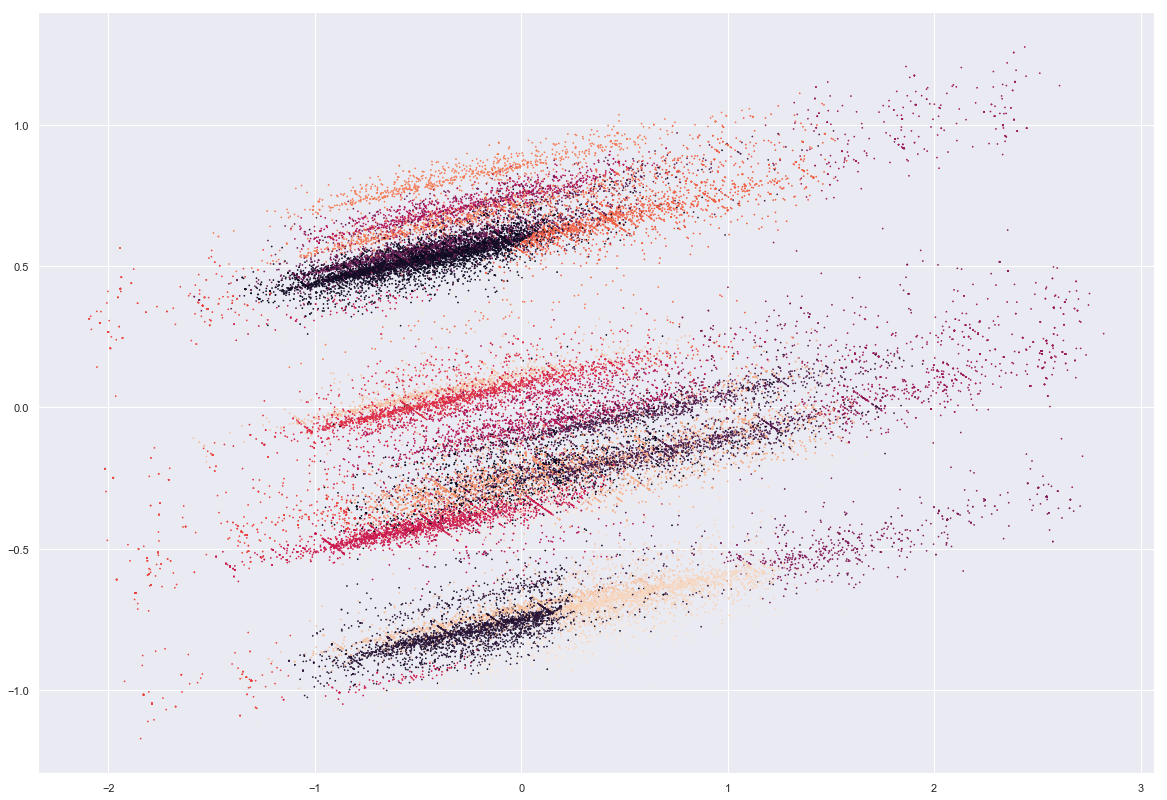

In [61]:
plt.scatter(df_pca[:,0], df_pca[:,1], c = clusters.labels, s = 0.5)
plt.show()